## Geometric Transformations of Images

#### Goals
<p> • Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.
<p> • You will see these functions: cv2.getPerspectiveTransform

### Transformations

<p>OpenCV provides two transformation functions, **cv2.warpAffine** and **cv2.warpPerspective**, with which you can have
all kinds of transformations. **cv2.warpAffine** takes a 2x3 transformation matrix while **cv2.warpPerspective** takes a
3x3 transformation matrix as input.

### Scaling

<p>Scaling is just resizing of the image. OpenCV comes with a function **cv2.resize()** for this purpose. The size of
the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are
used. Preferable interpolation methods are **cv2.INTER_AREA** for shrinking and **cv2.INTER_CUBIC** (slow) &
**cv2.INTER_LINEAR** for zooming. By default, interpolation method used is **cv2.INTER_LINEAR** for all resizing
purposes. You can resize an input image either of following methods:

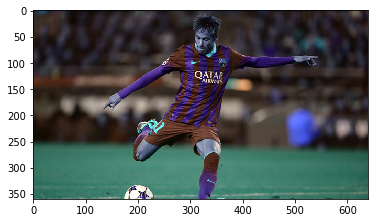

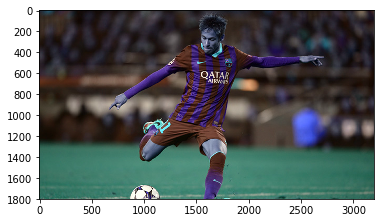

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/neymar.jpg')
res = cv2.resize(img,None,fx=5, fy=5, interpolation = cv2.INTER_CUBIC)

#Display the image
plt.imshow(img)
#Show all image
plt.show()

plt.imshow(res)
#Show all image
plt.show()


#OR
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)






### Translation

<p>Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (𝑡𝑥, 𝑡𝑦), you can create
the transformation matrix M as follows:
𝑀 =[︂1 0 𝑡𝑥
    0 1 𝑡𝑦]︂
<p>You can take make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine() function. See below
example for a shift of (100,50):

<p>**Warning: **Third argument of the cv2.warpAffine() function is the size of the output image, which should be in
the form of (width, height). Remember width = number of columns, and height = number of rows.

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/neymar.jpg',0)
rows,cols = img.shape

#Display the image
plt.imshow(img)
#Show all image
plt.show()

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

#Display the image
plt.imshow(dst)
#Show all image
plt.show()


### Rotation

<p>Rotation of an image for an angle 𝜃 is achieved by the transformation matrix of the form
𝑀 =
[︂
𝑐𝑜𝑠𝜃 −𝑠𝑖𝑛𝜃
𝑠𝑖𝑛𝜃 𝑐𝑜𝑠𝜃
]︂
<p>But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you
prefer. Modified transformation matrix is given by
[︂
𝛼 𝛽 (1 − 𝛼) · 𝑐𝑒𝑛𝑡𝑒𝑟.𝑥 − 𝛽 · 𝑐𝑒𝑛𝑡𝑒𝑟.𝑦
−𝛽 𝛼 𝛽 · 𝑐𝑒𝑛𝑡𝑒𝑟.𝑥 + (1 − 𝛼) · 𝑐𝑒𝑛𝑡𝑒𝑟.𝑦
]︂
<p>where:
𝛼 = 𝑠𝑐𝑎𝑙𝑒 · cos 𝜃,
𝛽 = 𝑠𝑐𝑎𝑙𝑒 · sin 𝜃
<p>To find this transformation matrix, OpenCV provides a function, cv2.getRotationMatrix2D. Check below example
which rotates the image by 90 degree with respect to center without any scaling


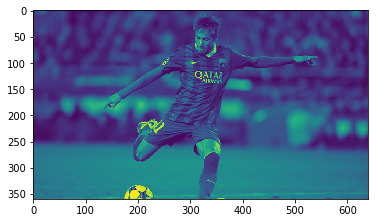

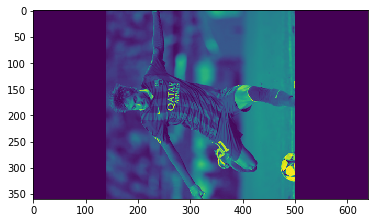

In [40]:
img = cv2.imread('img/neymar.jpg',0)
plt.imshow(img)
#Show all image
plt.show()
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)
#Show all image
plt.show()

### Affine Transformation
<p>In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the
transformation matrix, we need three points from input image and their corresponding locations in output image. Then
**cv2.getAffineTransform** will create a 2x3 matrix which is to be passed to cv2.warpAffine.
Check below example, and also look at the points I selected (which are marked in Green color):

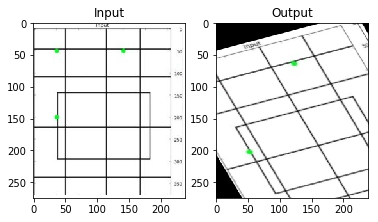

In [41]:
img = cv2.imread('img/affine.png')
rows,cols,ch = img.shape


pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Perspective Transformation

<p>For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after
the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points
on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be
found by the function **cv2.getPerspectiveTransform**. Then apply **cv2.warpPerspective** with this 3x3 transformation
matrix.
See the code below:

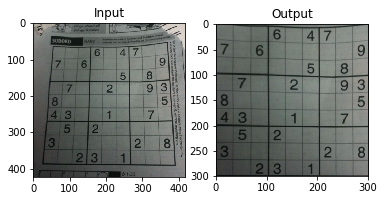

In [42]:
img = cv2.imread('img/sudoku.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()